In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pp

%matplotlib inline

# Lectura del corpus de datos

In [27]:
df = pd.read_csv('vehiculos.data', names = ['Valor','Mantenimiento','Puertas','Pasajeros',\
                                             'Cajuela','Seguridad','Clase'])
df.head()

,Valor,Mantenimiento,Puertas,Pasajeros,Cajuela,Seguridad,Clase
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Conversión de columnas de cadenas de texto en categorías

In [28]:
#df['Valor'] = df['Valor'].astype('category')
#df.head()

for i in range(7):
    #if i!=2 and i!=3:
     df.iloc[:,i] = df.iloc[:,i].astype('category')

## Codificación de las columnas categóricas

In [29]:
#df['Valor'] = df['Valor'].cat.codes
#df.head()

for i in range(7):
    #if i!=2 and i!=3:
     df.iloc[:,i] = df.iloc[:,i].cat.codes
        
df.head()

,Valor,Mantenimiento,Puertas,Pasajeros,Cajuela,Seguridad,Clase
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


## Análisis de correlación de las variables

In [30]:
correlaciones = df.corr()
correlaciones

,Valor,Mantenimiento,Puertas,Pasajeros,Cajuela,Seguridad,Clase
Valor,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
Mantenimiento,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
Puertas,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
Pasajeros,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
Cajuela,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
Seguridad,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
Clase,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


<AxesSubplot:>

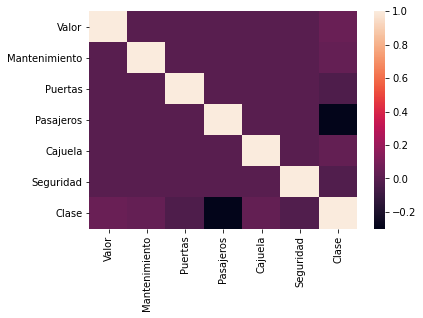

In [31]:
sns.heatmap(correlaciones)

## Separación datos de entrada y salida

In [32]:
X = df.iloc[:, np.r_[0:6]]
X.head()

,Valor,Mantenimiento,Puertas,Pasajeros,Cajuela,Seguridad
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [33]:
y = df.iloc[:, 6]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Clase, dtype: int8

In [34]:
y = pd.get_dummies(y, prefix = 'Clase')
y.head()

,Clase_0,Clase_1,Clase_2,Clase_3
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


## Escalado de datos usando Min Max Scaler (paquete Scikit-Learn)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X)
X_escala = scaler.transform(X)

X_escala

array([[1.        , 1.        , 0.        , 0.        , 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.33333333, 1.        , 1.        , 0.        ,
        0.5       ],
       [0.33333333, 0.33333333, 1.        , 1.        , 0.        ,
        1.        ],
       [0.33333333, 0.33333333, 1.        , 1.        , 0.        ,
        0.        ]])

## Dividir el corpus de datos en entrenamiento y pruebas

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_escala, y, random_state = 27, stratify = y)

## Creación de la red neuronal

In [37]:
mlp = MLPClassifier(hidden_layer_sizes = (20, 10, 4), max_iter = 1500, solver = 'adam', \
                   verbose = 10, random_state = 23, alpha = 0.01)

mlp

MLPClassifier(alpha=0.01, hidden_layer_sizes=(20, 10, 4), max_iter=1500,
              random_state=23, verbose=10)

## Entrenar la red neuronal

In [38]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 3.12356258
Iteration 2, loss = 3.07163982
Iteration 3, loss = 3.02605801
Iteration 4, loss = 2.98666976
Iteration 5, loss = 2.94944752
Iteration 6, loss = 2.91553036
Iteration 7, loss = 2.88362982
Iteration 8, loss = 2.85368667
Iteration 9, loss = 2.82407140
Iteration 10, loss = 2.79702401
Iteration 11, loss = 2.77051658
Iteration 12, loss = 2.74463343
Iteration 13, loss = 2.71864270
Iteration 14, loss = 2.69246460
Iteration 15, loss = 2.66625381
Iteration 16, loss = 2.63961512
Iteration 17, loss = 2.61218722
Iteration 18, loss = 2.58500443
Iteration 19, loss = 2.55682089
Iteration 20, loss = 2.52914129
Iteration 21, loss = 2.50052929
Iteration 22, loss = 2.47282469
Iteration 23, loss = 2.44465130
Iteration 24, loss = 2.41599369
Iteration 25, loss = 2.38794130
Iteration 26, loss = 2.35974364
Iteration 27, loss = 2.33057123
Iteration 28, loss = 2.30186799
Iteration 29, loss = 2.27315425
Iteration 30, loss = 2.24409222
Iteration 31, loss = 2.21492750
Iteration 32, los

Iteration 277, loss = 0.45164700
Iteration 278, loss = 0.45054388
Iteration 279, loss = 0.45017894
Iteration 280, loss = 0.44960561
Iteration 281, loss = 0.44877398
Iteration 282, loss = 0.44712769
Iteration 283, loss = 0.44608625
Iteration 284, loss = 0.44422137
Iteration 285, loss = 0.44295834
Iteration 286, loss = 0.44272020
Iteration 287, loss = 0.44059447
Iteration 288, loss = 0.43957840
Iteration 289, loss = 0.43914680
Iteration 290, loss = 0.43763722
Iteration 291, loss = 0.43656343
Iteration 292, loss = 0.43590949
Iteration 293, loss = 0.43484175
Iteration 294, loss = 0.43393293
Iteration 295, loss = 0.43409354
Iteration 296, loss = 0.43139060
Iteration 297, loss = 0.43106627
Iteration 298, loss = 0.43047418
Iteration 299, loss = 0.42867864
Iteration 300, loss = 0.42829385
Iteration 301, loss = 0.42912319
Iteration 302, loss = 0.42638074
Iteration 303, loss = 0.42587784
Iteration 304, loss = 0.42389263
Iteration 305, loss = 0.42337875
Iteration 306, loss = 0.42288882
Iteration 

Iteration 532, loss = 0.28176231
Iteration 533, loss = 0.28157381
Iteration 534, loss = 0.27837935
Iteration 535, loss = 0.27826565
Iteration 536, loss = 0.27753135
Iteration 537, loss = 0.27624764
Iteration 538, loss = 0.27584204
Iteration 539, loss = 0.27561833
Iteration 540, loss = 0.27484369
Iteration 541, loss = 0.27428685
Iteration 542, loss = 0.27374964
Iteration 543, loss = 0.27396696
Iteration 544, loss = 0.27314319
Iteration 545, loss = 0.27483764
Iteration 546, loss = 0.27356926
Iteration 547, loss = 0.27293715
Iteration 548, loss = 0.27219463
Iteration 549, loss = 0.27132563
Iteration 550, loss = 0.27144637
Iteration 551, loss = 0.27318050
Iteration 552, loss = 0.26973141
Iteration 553, loss = 0.26953819
Iteration 554, loss = 0.27021145
Iteration 555, loss = 0.26880631
Iteration 556, loss = 0.26856419
Iteration 557, loss = 0.26921075
Iteration 558, loss = 0.26727930
Iteration 559, loss = 0.26809515
Iteration 560, loss = 0.26722028
Iteration 561, loss = 0.26667025
Iteration 

Iteration 804, loss = 0.18930085
Iteration 805, loss = 0.19026278
Iteration 806, loss = 0.18897551
Iteration 807, loss = 0.18933745
Iteration 808, loss = 0.18976043
Iteration 809, loss = 0.18885045
Iteration 810, loss = 0.18748983
Iteration 811, loss = 0.18825548
Iteration 812, loss = 0.18724923
Iteration 813, loss = 0.18760578
Iteration 814, loss = 0.18696798
Iteration 815, loss = 0.18769204
Iteration 816, loss = 0.18716396
Iteration 817, loss = 0.18637592
Iteration 818, loss = 0.18616776
Iteration 819, loss = 0.18639744
Iteration 820, loss = 0.18580216
Iteration 821, loss = 0.18562371
Iteration 822, loss = 0.18619677
Iteration 823, loss = 0.18514140
Iteration 824, loss = 0.18544602
Iteration 825, loss = 0.18482875
Iteration 826, loss = 0.18480493
Iteration 827, loss = 0.18462680
Iteration 828, loss = 0.18451349
Iteration 829, loss = 0.18431740
Iteration 830, loss = 0.18637841
Iteration 831, loss = 0.18622855
Iteration 832, loss = 0.18499280
Iteration 833, loss = 0.18260423
Iteration 

Iteration 1058, loss = 0.15586552
Iteration 1059, loss = 0.15412197
Iteration 1060, loss = 0.15267414
Iteration 1061, loss = 0.15297582
Iteration 1062, loss = 0.15275076
Iteration 1063, loss = 0.15348957
Iteration 1064, loss = 0.15233261
Iteration 1065, loss = 0.15294537
Iteration 1066, loss = 0.15297353
Iteration 1067, loss = 0.15340589
Iteration 1068, loss = 0.15208905
Iteration 1069, loss = 0.15228546
Iteration 1070, loss = 0.15177114
Iteration 1071, loss = 0.15196450
Iteration 1072, loss = 0.15164280
Iteration 1073, loss = 0.15163180
Iteration 1074, loss = 0.15131460
Iteration 1075, loss = 0.15231695
Iteration 1076, loss = 0.15158346
Iteration 1077, loss = 0.15145799
Iteration 1078, loss = 0.15164456
Iteration 1079, loss = 0.15166536
Iteration 1080, loss = 0.15131783
Iteration 1081, loss = 0.15110550
Iteration 1082, loss = 0.15070157
Iteration 1083, loss = 0.15053945
Iteration 1084, loss = 0.15115472
Iteration 1085, loss = 0.15261975
Iteration 1086, loss = 0.15360043
Iteration 1087

MLPClassifier(alpha=0.01, hidden_layer_sizes=(20, 10, 4), max_iter=1500,
              random_state=23, verbose=10)

In [39]:
y_predicciones = mlp.predict(X_test) 
y_predicciones

array([[0, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

## Calculamos la precisión de la red

In [40]:
accuracy_score(y_test, y_predicciones)

0.9004629629629629

## Cálculo de la matriz de confusión

In [41]:
confusion_matrix(y_test.to_numpy().argmax(axis = 1), y_predicciones.argmax(axis = 1))

array([[ 94,   2,   0,   0],
       [  6,  11,   0,   0],
       [  5,   0, 298,   0],
       [  3,  13,   0,   0]])

## Visualización de la curva de aprendizaje del Perceptrón Multicapa como Clasificador

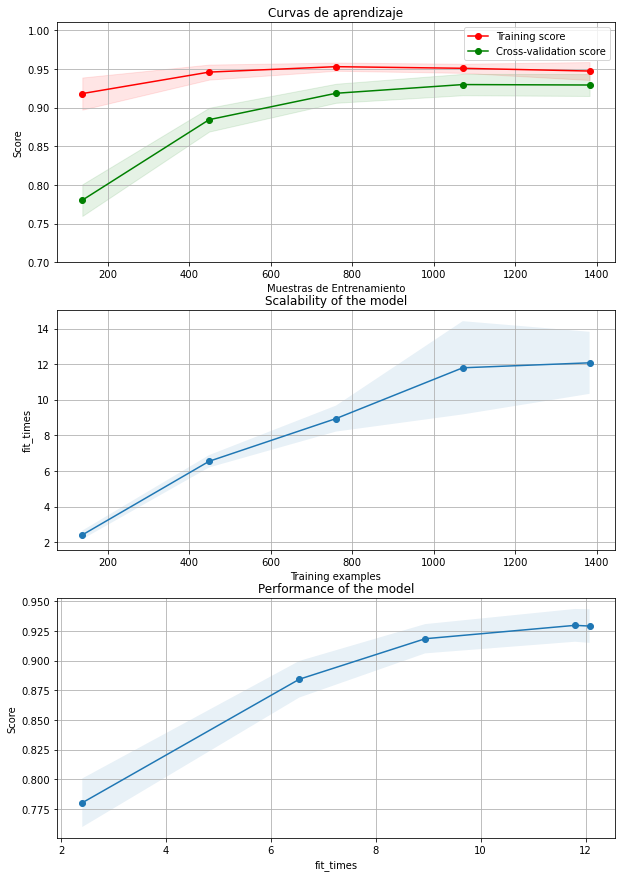

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Muestras de Entrenamiento")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 1, figsize=(10, 15))


title = "Curvas de aprendizaje"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = mlp
plot_learning_curve(
    estimator, title, X_escala, y, axes=axes, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()